In [1]:
import numpy as np
import pandas as pd
# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

#import cv2
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torchvision

# Plots
import matplotlib.pyplot as plt

# Utils
from tqdm import tqdm, trange
import os

## Utils

# Pytorch API

Package| 	Description|
-|-|
`torch`| 	The top-level PyTorch package and tensor library.
`torch.nn`| 	A subpackage that contains modules and extensible classes for building neural networks.
`torch.autograd`| 	A subpackage that supports all the differentiable Tensor operations in PyTorch.
`torch.nn.functional`| 	A functional interface that contains typical operations used for building neural networks like loss functions, activation functions, and convolution operations.
`torch.optim`| 	A subpackage that contains standard optimization operations like SGD and Adam.
`torch.utils`| 	A subpackage that contains utility classes like data sets and data loaders that make data preprocessing easier.
`torchvision`| 	A package that provides access to popular datasets, model architectures, and image transformations for computer vision. 

# Tensors

## Tensor introduction

 Each of these examples are specific instances of the more general concept of a tensor:
- number / scalar
- array / vector
- 2d-array / matrix

Tensors are generalizations: $n$d-arrays

In [2]:
x = torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [3]:
# Dtypes
x = torch.tensor([1, 2, 3], dtype = torch.float32)
x

tensor([1., 2., 3.])

In [4]:
x = torch.tensor(2)
x

tensor(2)

In [5]:
x.item(), type(x.item())

(2, int)

### Get information about a tensor

In [6]:
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}")

Shape of tensor: torch.Size([])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


### Tensor operations

#### Matrix Operations

In [7]:
x = torch.tensor([[1, 2, 3],
                 [4, 5, 6]], dtype = torch.float32)

In [8]:
x.shape

torch.Size([2, 3])

In [9]:
print(x.sum())
print(x.sum(axis = 0))
print(x.sum(axis = 1))

tensor(21.)
tensor([5., 7., 9.])
tensor([ 6., 15.])


In [10]:
y = 2 * torch.ones((3, 2))
y

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

- Matrix multiplication
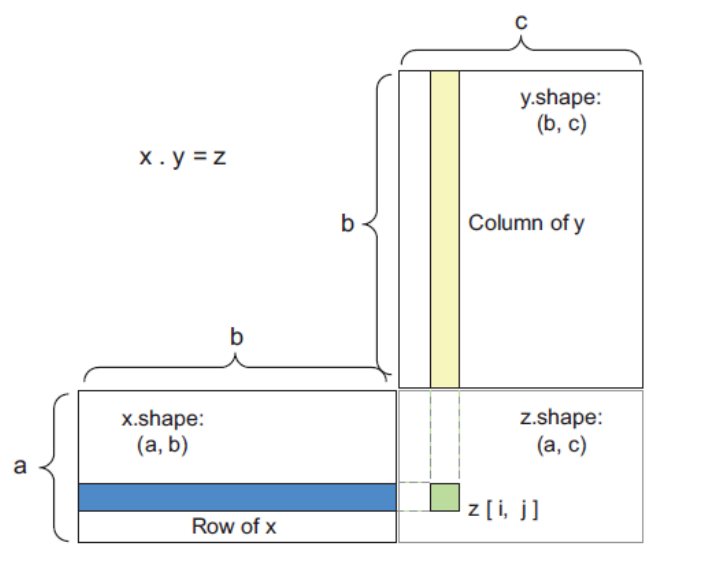

In [11]:

print(x.matmul(y))
print(x @ y)

tensor([[12., 12.],
        [30., 30.]])
tensor([[12., 12.],
        [30., 30.]])


In [12]:
# Add 1 to vector
x + 1

tensor([[2., 3., 4.],
        [5., 6., 7.]])

In [13]:
# Elementwise multiplication
x * y.T

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

#### Reshape, squeeze, flatten

In [14]:
print(x)
print(x.reshape(3, 2))
print(x.flatten())

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([1., 2., 3., 4., 5., 6.])


In [15]:
print(x, x.shape)
print()
print(x.unsqueeze(0), x.unsqueeze(0).shape)

print(x.unsqueeze(-1), x.unsqueeze(-1).shape)

print(x.unsqueeze(1), x.unsqueeze(1).shape)


tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3])

tensor([[[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([1, 2, 3])
tensor([[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]]]) torch.Size([2, 3, 1])
tensor([[[1., 2., 3.]],

        [[4., 5., 6.]]]) torch.Size([2, 1, 3])


### Concatenation

In [16]:
x = torch.tensor([[1, 2, 3],
                 [4, 5, 6]])
y = torch.tensor([[10, 20, 30],
                 [40, 50, 60]])

torch.cat([x, y], dim = 0)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 20, 30],
        [40, 50, 60]])

In [17]:
torch.cat([x, y], dim = 1)

tensor([[ 1,  2,  3, 10, 20, 30],
        [ 4,  5,  6, 40, 50, 60]])

## Usual tensor dimensions used in practice

1. 2D - Numerical data (Vector data):
- `(num_samples, num_features)`
2. 3D - Time series: 
- `(num_samples, num_timesteps, num_features)`
3. 4D - Image data: 
- `(num_samples, height, width, channels)` or `(channels, num_samples, height, width)`
4. 5D - Video:
- `(num_samples, frames, height, width, channels)`



# Cuda

## Device 

In [18]:
torch.cuda.is_available()

True

In [19]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


In [20]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA GeForce GTX 970', major=5, minor=2, total_memory=4039MB, multi_processor_count=13)

In [21]:
torch.cuda.device_count()

1

## Memory

In [22]:
print(torch.cuda.memory_summary(abbreviated=True))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| GPU reserved memory   |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------

In [23]:
def print_memory_stats(mb = True):
    d = 1
    if mb == True: 
        d = 1024 * 1024
        
    t = torch.cuda.get_device_properties(0).total_memory / d
    r = torch.cuda.memory_reserved(0) / d
    a = torch.cuda.memory_allocated(0)  / d
    f = r-a  # free inside reserved
    print(f"total memory: {t} MB")
    print(f"reserved memory: {r} MB")
    print(f"allocated memory: {a} MB")
    print(f"free memory inside reserved : {f} MB")
    #return t, r, a, f

In [24]:
# Look at memory
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [25]:
x = torch.rand(1000000)
x, x.device

(tensor([0.4654, 0.2419, 0.1720,  ..., 0.9997, 0.0504, 0.7908]),
 device(type='cpu'))

In [26]:
# Put a tensor into gpu memory
x = x.cuda()
print(x.device)
print_memory_stats()

cuda:0
total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 3.81494140625 MB
free memory inside reserved : 16.18505859375 MB


In [27]:
# Try to empty cache. It's the same since we have a reference to `x`
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 3.81494140625 MB
free memory inside reserved : 16.18505859375 MB


In [28]:
# Delete x and look at memory. 
del x
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 20.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 20.0 MB


In [29]:
#Indeed, we can't acces `x` anymore
x

NameError: name 'x' is not defined

In [30]:
# Try to empty cache. 
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [31]:
torch.tensor([1, 2, 3]).cuda()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 2.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 2.0 MB


In [32]:
def pretty_size(size):
    """Pretty prints a torch.Size object"""
    assert(isinstance(size, torch.Size))
    return " × ".join(map(str, size))

def dump_tensors(gpu_only=True, delete=True):
    """Prints a list of the Tensors being tracked by the garbage collector."""
    import gc
    total_size = 0
    for obj in gc.get_objects(): # Get objects in Garbage collector
        try:
            if torch.is_tensor(obj): # If the object is a tensor
                if not gpu_only or obj.is_cuda: # If it's on cuda
                    print(f"{type(obj).__name__}: {' GPU' if obj.is_cuda else ''}{' pinned' if obj.is_pinned else ''} {pretty_size(obj.size())}")
                    total_size += obj.numel()
                    if delete:
                        del obj
            elif hasattr(obj, "data") and torch.is_tensor(obj.data): # If the object has data
                if not gpu_only or obj.is_cuda: # If it's on cuda
                    # Print stuff about it
                    print("%s → %s:%s%s%s%s %s" % (type(obj).__name__,  
                                                   type(obj.data).__name__, 
                                                   " GPU" if obj.is_cuda else "",
                                                   " pinned" if obj.data.is_pinned else "",
                                                   " grad" if obj.requires_grad else "", 
                                                   " volatile" if obj.volatile else "",
                                                   pretty_size(obj.data.size())))
                    
                    total_size += obj.data.numel()
                    if delete:
                        del obj
                        
        except Exception as e:
            pass        
    if delete:
        torch.cuda.empty_cache()
    print("Total size:", total_size)

In [33]:
x = torch.rand((100, 100, 100)).cuda()
y = torch.rand((2134, 4444)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Tensor:  GPU pinned 2134 × 4444
Total size: 10483496


/home/zademn/.conda/envs/pytorch_env/lib/python3.9/site-packages/torch/distributed/distributed_c10d.py:170: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


In [34]:
del x, y

In [35]:
dump_tensors()

Total size: 0


## GPU to CPU

In [36]:
x = torch.rand((100, 100, 100)).cuda()
dump_tensors()

Tensor:  GPU pinned 100 × 100 × 100
Total size: 1000000


In [37]:
x = x.cpu()

In [38]:
dump_tensors()

Total size: 0


In [39]:
del x

In [40]:
dump_tensors()

Total size: 0


In [41]:
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


In [42]:
torch.cuda.empty_cache()
print_memory_stats()

total memory: 4039.75 MB
reserved memory: 0.0 MB
allocated memory: 0.0 MB
free memory inside reserved : 0.0 MB


# Data

## Dataset, DataLoader

- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [43]:
from torch.utils.data import Dataset, DataLoader

In [44]:
class MyDataset(Dataset):
    def __init__(self):
        numbers = np.arange(100)
        self.data = numbers
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index]

In [45]:
dataset = MyDataset()
print(len(dataset))
print(dataset.data)

100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# Training

**Videos**
- [DeepLizard playlist](https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)
- [loss function](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Activation functions](https://www.youtube.com/watch?v=s-V7gKrsels)
- [Optimizers](https://www.youtube.com/watch?v=mdKjMPmcWjY)

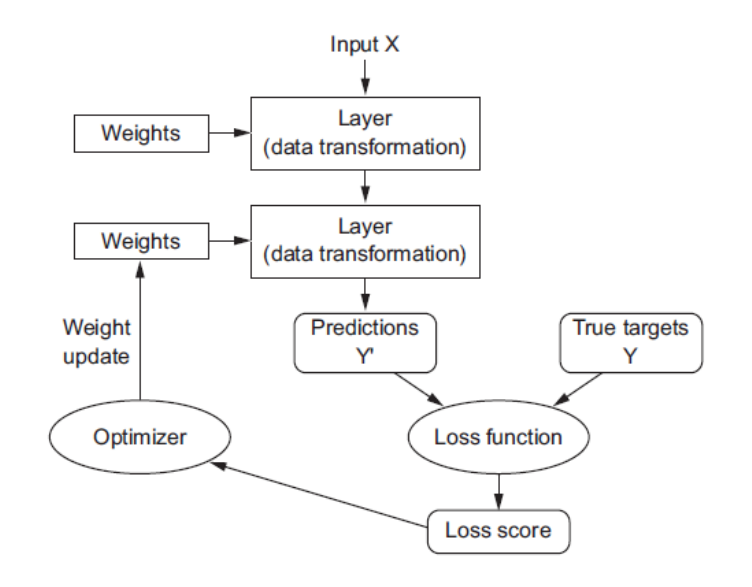

## Data

In [51]:
from torchvision.datasets import MNIST
from einops import rearrange

In [47]:
train_data = MNIST(root = os.path.join('..', 'data', 'tmp', 'mnist'), download=True, train=True)
test_data = MNIST(root = os.path.join('..', 'data', 'tmp', 'mnist'), download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../data/tmp/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/tmp/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/tmp/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/tmp/mnist/MNIST/raw



In [54]:
import pandas as pd

X_train, y_train = train_data.data, train_data.targets
X_test, y_test = test_data.data, test_data.targets
X_train = X_train / 255
X_test = X_test / 255

# Combine height and width dim
#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]**2)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]**2)
X_train = rearrange(X_train, "b h w -> b (h w)") 
X_test = rearrange(X_test, "b h w -> b (h w)")


X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([60000, 784]),
 torch.Size([10000, 784]),
 torch.Size([60000]),
 torch.Size([10000]))

In [55]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
X.shape, y.shape

((70000, 784), (70000,))

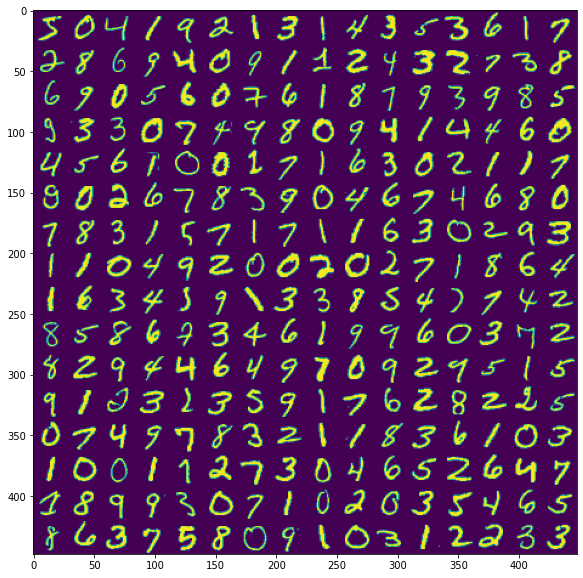

In [83]:
G = 16
X_sel = X[:G * G]
plt.figure(figsize = (10, 10))
# split batch dim 256 = 16 * 16 and points dim 784 = 28 * 28 then rearrange into 16 * 28 x 16 x 28 grid.
plt.imshow(rearrange(X_sel, "(g1 g2) (n1 n2) -> (g1 n1) (g2 n2)", g1 = 16, g2 = 16, n1 = 28, n2 = 28))
#plt.imshow(np.concatenate(X_sel.reshape(G, 28 * G, 28), axis = 1))

In [84]:
class DigitsDataset(Dataset):
    def __init__(self, X, y):
        # Make your own dataset. Include self.num_features, self.num_classes for ease of use
        # Code here
        self.X = torch.tensor(X, dtype = torch.float32)
        self.y = torch.tensor(y, dtype = torch.long)
        self.num_features = X.shape[1]
        self.num_classes = len(np.unique(y))
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [85]:
dataset = DigitsDataset(X, y)
#dataloader = DataLoader(dataset, batch_size = 64, shuffle = True)

In [86]:
from torch.utils.data import random_split

train_len = int(.8 * len(dataset))
test_len = len(dataset) - train_len

train_dataset, test_dataset = random_split(dataset, [train_len, test_len])

## Models

In [73]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        # Hidden layers
        self.fc = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = self.fc(x)
        x = self.fc2(x)
        return F.softmax(x, dim = 1)
    
# Make and use a stronger model


In [74]:
input_shape = dataset.num_features
output_shape = dataset.num_classes
model = Model(input_shape, output_shape)
#model.cuda()

In [75]:
model

Model(
  (fc): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [76]:
for p in model.parameters():
    print(p.shape)
    #print(p)

torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


## Optimizers, loss

In [77]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_function = nn.CrossEntropyLoss()

## Training

In [78]:
batch_size = 64
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(train_dataset, batch_size=len(test_dataset))

In [79]:
epochs = 5
accs = []
losses = []
model.train() # Set the model to training mode
for epoch in (t:= trange(epochs)):
    
    loss_epoch = 0.
    acc = 0.
    num_batches = 0
    for X_batch, y_batch in trainloader:
        num_batches +=1
        y_pred = model(X_batch)
        
        loss = loss_function(y_pred, y_batch)    
        loss_epoch += loss.item()
        
        acc += accuracy_score(torch.argmax(y_pred, axis = 1), y_batch)
        
        optimizer.zero_grad() # don't forget this
        loss.backward()
        optimizer.step()
    
    acc /= num_batches
    loss_epoch /= num_batches
    losses.append(loss_epoch)
    accs.append(acc)
    t.set_description(f"Loss: {round(loss_epoch, 2), round(acc, 2)}")

Loss: (1.56, 0.92): 100%|████████████| 5/5 [00:03<00:00,  1.28it/s]


## Evaluate

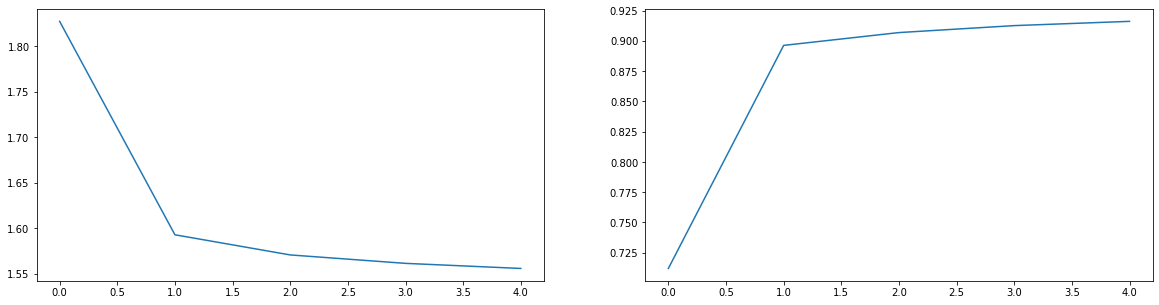

In [80]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(losses)
axs[1].plot(accs)

In [81]:
model.eval()
X_test, y_test = test_dataset.dataset.X, test_dataset.dataset.y
y_pred= model(X_test)

print(accuracy_score(torch.argmax(y_pred, axis = 1), y_test))

0.9180142857142857
